In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [61]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [62]:
df1=df.drop(['enginelocation', 'fuelsystem','aspiration','symboling','car_ID' , 'enginetype' ,'doornumber'] ,axis=1)

In [63]:
df1['CarName'] = LabelEncoder().fit_transform(df1['CarName'])
df1['fueltype'] = LabelEncoder().fit_transform(df1['fueltype'])
df1['fueltype'] = LabelEncoder().fit_transform(df1['fueltype'])
df1['drivewheel'] = LabelEncoder().fit_transform(df1['drivewheel'])
df1['cylindernumber'] = LabelEncoder().fit_transform(df1['cylindernumber'])
df1['carbody'] = LabelEncoder().fit_transform(df1['carbody'])

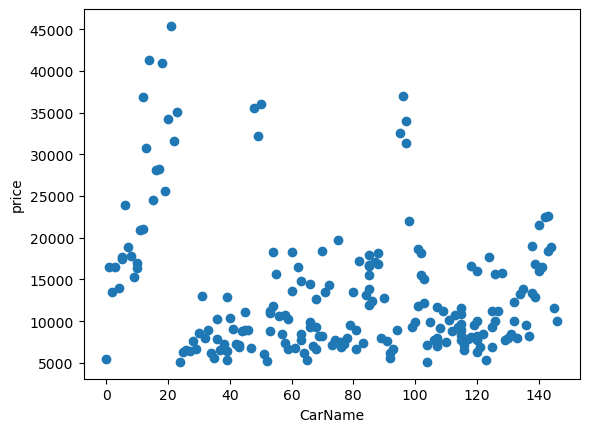

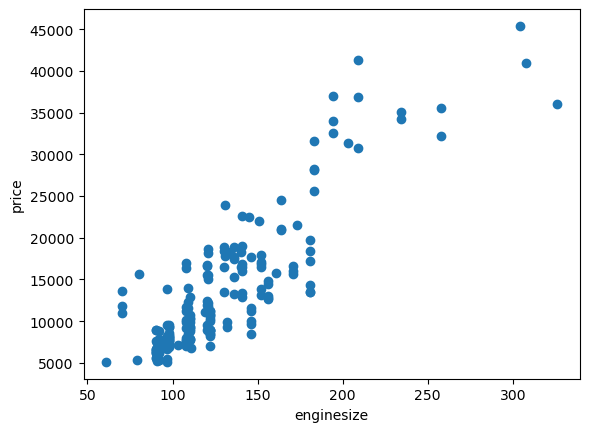

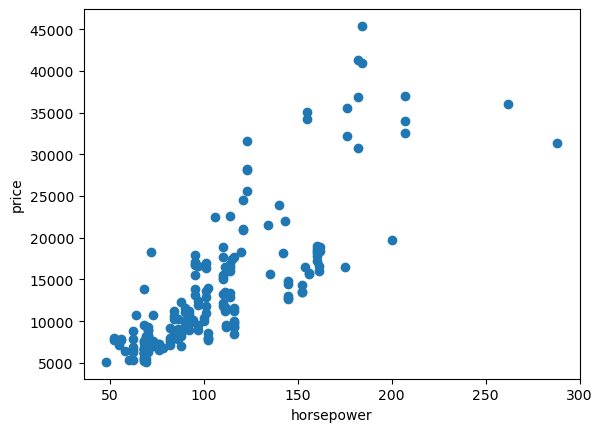

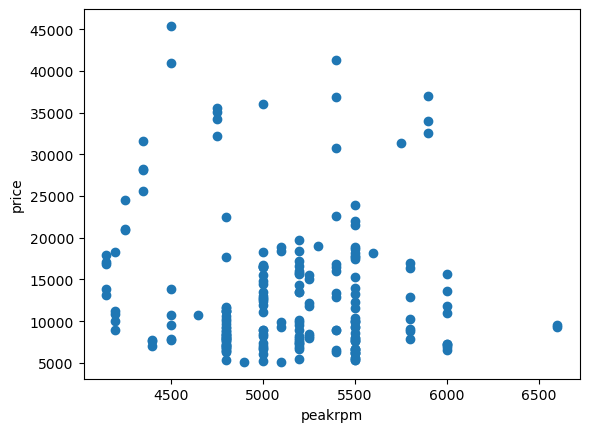

In [76]:
def priceplot(x):
    plt.scatter(df1[x],df1['price'])
    plt.xlabel(x)
    plt.ylabel('price')
    plt.show()
    
priceplot('CarName')
priceplot('enginesize')
priceplot('horsepower')
priceplot('peakrpm')
    

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


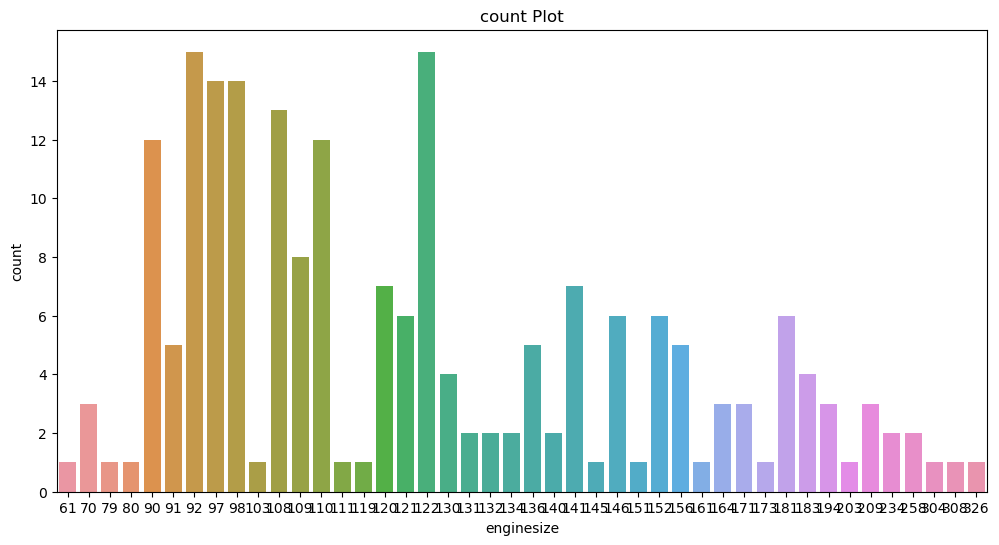

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


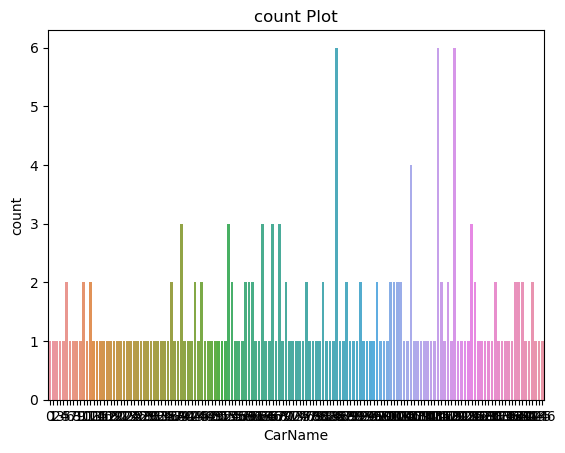

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


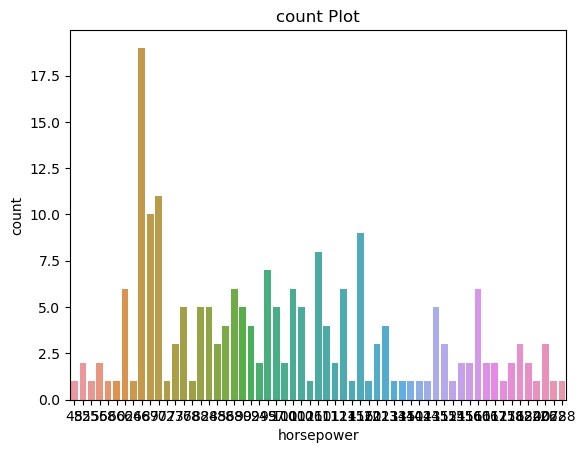

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


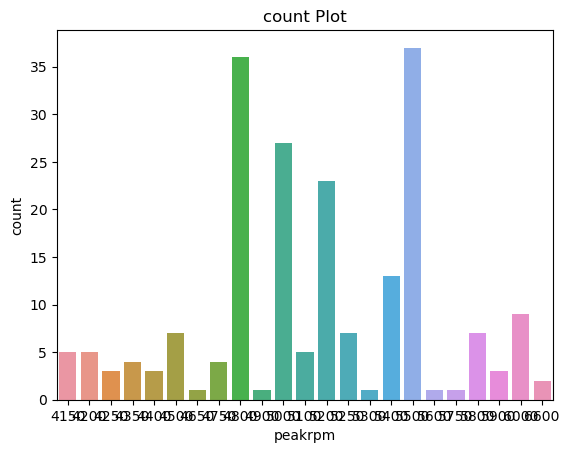

In [99]:
plt.figure(figsize=(12, 6))
def count(x):
    sns.countplot(df1[x])
    plt.xlabel(x)
    plt.title('count Plot')
    plt.show()
    
    
count('enginesize')
count('CarName')
count('horsepower')
count('peakrpm')


<Figure size 1200x600 with 0 Axes>

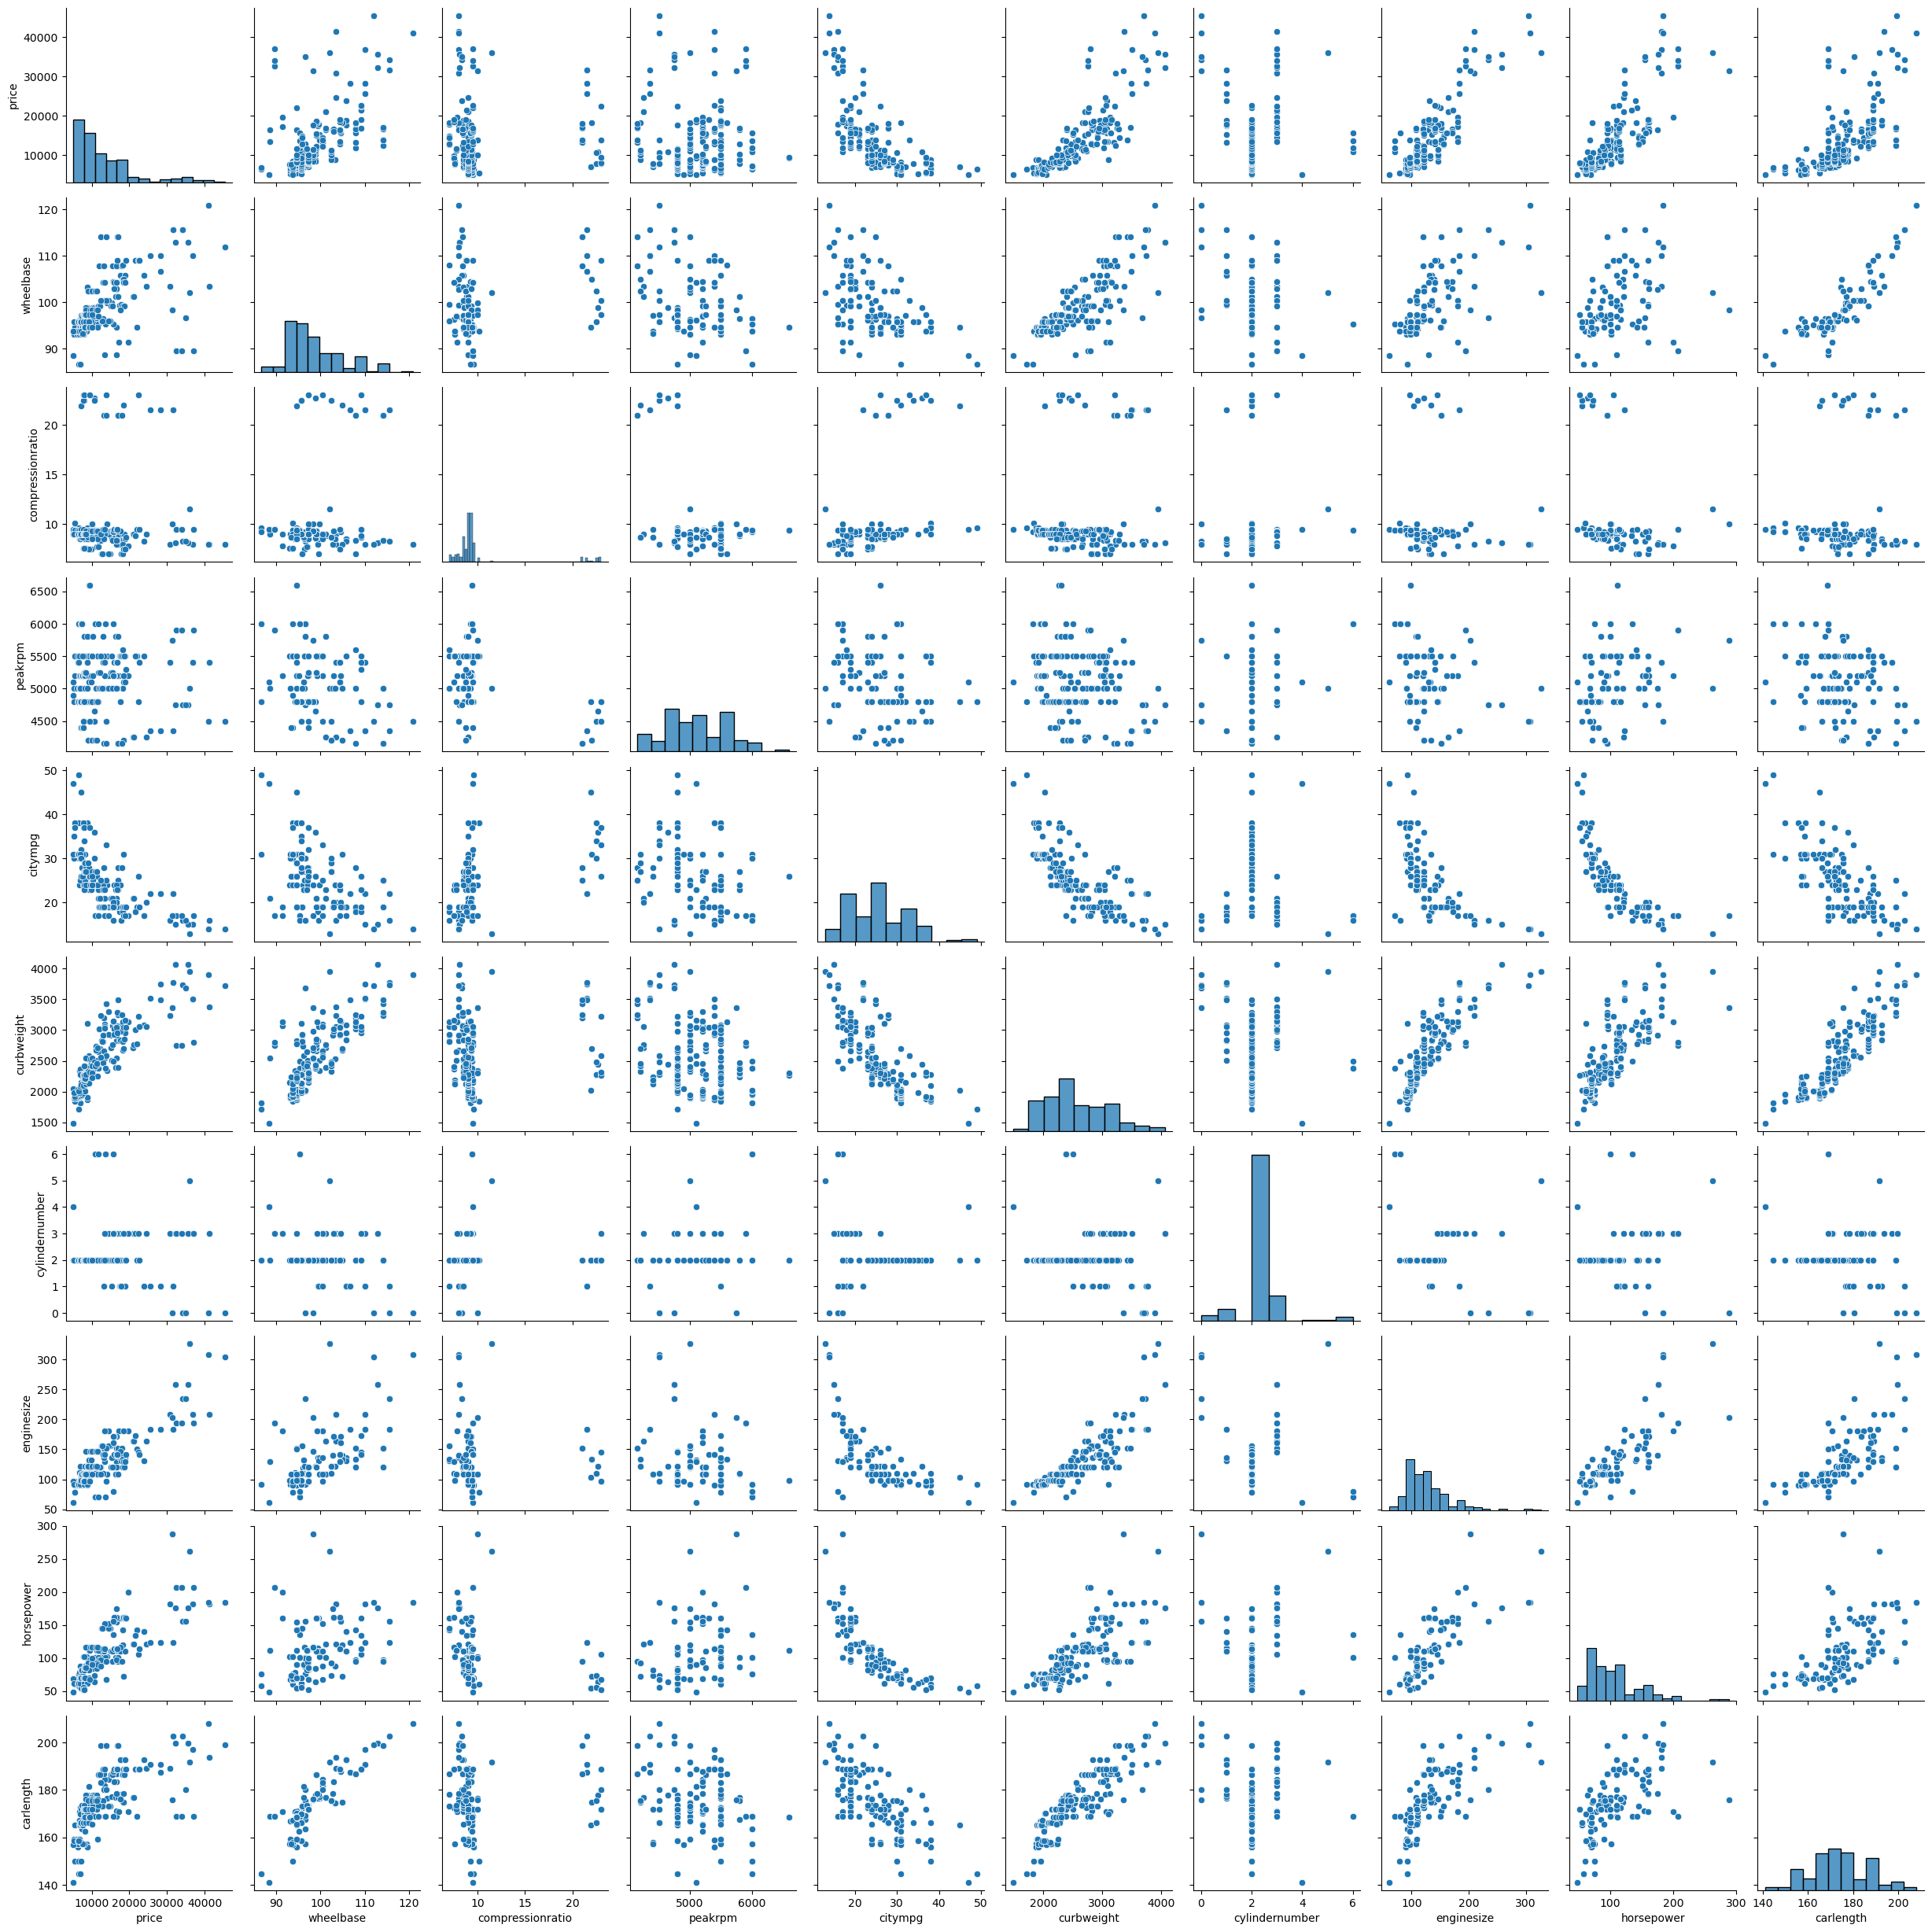

In [105]:
cars = df1[['price','wheelbase','compressionratio','peakrpm','citympg','curbweight','cylindernumber', 'enginesize','horsepower','carlength']]                                        
plt.figure(figsize=(12, 6))
sns.pairplot(cars)


In [65]:
X=df1.drop(['price'] , axis=1)
Y=df1['price']

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [67]:
model=LinearRegression()

In [68]:
model.fit(X_train,Y_train)

LinearRegression()

In [69]:
y_pred = model.predict(X_test)

In [70]:
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 11158003.564523919
